# K-means clustering algorithm 

In [10]:
import numpy as np # imports
import matplotlib.pyplot as plt

In [51]:
def get_distance(x1, x2): # find distance between two vectors using pythagorian theorem
    sum = 0
    for i in range(len(x1)):
        sum += (x1[i] - x2[i]) ** 2
    return np.sqrt(sum)

def get_data():
    
    X = [] # create an artificial data-set

    for i in range(20):
        X.append(np.random.uniform(low=1, high=20, size=(2)))

    for i in range(20):
        X.append(np.random.uniform(low=50, high=150, size=(2)))
    
    for i in range(20):
        X.append(np.random.uniform(low=200, high=300, size=(2)))

    for i in range(20):
        X.append(np.random.uniform(low=400, high=600, size=(2)))
    
    return np.array(X)

In [52]:
X = get_data() # create an artificial data-set

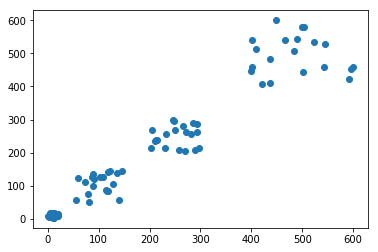

In [53]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [54]:
k = 5
max_iters = 100

centroids = X[np.random.choice(range(len(X)), k, replace=False)] # randomly select k data point
# centroids = [np.random.uniform(size=len(X[0])) for i in range(k)] # create k random points with X[0] length

converged = False # Flag to terminate process after convergence 
current_iter = 0 

while (not converged) and (current_iter < max_iters):

    cluster_list = [[] for i in range(len(centroids))] # cluster for each centeroid

    for x in X:  # Go through each data point
        distances_list = []
        for c in centroids:
            distances_list.append(get_distance(c, x)) # get distance to each centeroid
        cluster_list[int(np.argmin(distances_list))].append(x) # add for minimum distance

    cluster_list = list((filter(None, cluster_list))) # remove clusters which are empty

    prev_centroids = centroids.copy() # save centroids to compare later

    centroids = []

    for j in range(len(cluster_list)):
        centroids.append(np.mean(cluster_list[j], axis=0)) # calculate the new clusters

    pattern = np.abs(np.sum(prev_centroids) - np.sum(centroids)) # get rate of convergence

    print('K-MEANS: ', int(pattern))

    converged = (pattern == 0) # check for convergence

    current_iter += 1

K-MEANS:  100
K-MEANS:  1
K-MEANS:  4
K-MEANS:  8
K-MEANS:  38
K-MEANS:  44
K-MEANS:  15
K-MEANS:  0


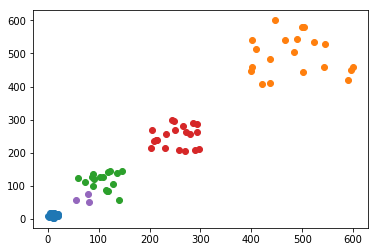

In [55]:
cluster_list = np.array(cluster_list)
for i in range(len(cluster_list)):
    c = np.array(cluster_list[i])
    plt.scatter(c[:,0],c[:,1])
plt.show()